In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import sympy
from scipy import sparse as sp
from scipy import sparse as sp


In [3]:


def sound_func(xl,tl):    
    return (np.cos(np.pi*tl+np.pi*xl))

"""

def u_exact(x,t):

    return np.cos(np.pi*t+np.pi*x)"""


def u_exact(x,t):
    u = []
    # for t_val in t:
    u_t = []
    for x_val in x:
        u_t.append(np.cos(np.pi*t)*np.sin(np.pi*x_val))
    u.append(u_t)

    return u



In [56]:
def A_matrix(n,c,L):
    xpoints = np.linspace(0,L,n)
    dx = xpoints[1]-xpoints[0]
    A= (c**2/(dx**2))*(-2*np.diag(np.ones(n-1), k=0) +np.diag(np.ones(n-2), k=-1) +np.diag(np.ones(n-2), k=1))
    return A





def f_true(u_k,c,L):

    n = int(len(u_k)/2)+1


    xpoints = np.linspace(0,L,n)
    dx = xpoints[1]-xpoints[0]


    zeros = np.zeros((n - 1, n - 1))

    row1 = np.concatenate((zeros, np.eye(n - 1)), 1)
    row2 = np.concatenate((c ** 2 / (dx ** 2) * A_matrix(n,c,L), zeros), 1)

    B = sp.csr_matrix(np.concatenate((row1, row2)))

    return B @ u_k

# def rk4(u_k, delta_t,c,L):
#     y1 = f_true(u_k,c,L)
#     y2 = f_true(u_k+(0.5*delta_t*y1),c,L)
#     y3 = f_true(u_k+(0.5*delta_t*y2),c,L)
#     y4 = f_true(u_k+(1*delta_t*y3),c,L)
#     u_kplus1 = u_k + (1/6)*delta_t*(y1+(2*y2)+(2*y3)+y4)
#     return u_kplus1

# don't forget to import any Python libraries required for your function...


def forward_euler(u_k, delta_t,c,L):
    """Returns the predicted next state u_{k+1} using the forward Euler method.

    This function assumes an f_true(u) function is globally available for calculating the true function value at u.
    
    Parameters
    ----------
    u_k : array
        Current state vector u_k
    delta_t : float_like
        Time step size where delta_t = t_{k+1} - t_k
        
    Returns
    -------
    u_kplus1 : array
        1 x N array of the predicted next state vector u_{k+1} where N = number of state variables = |u|
    
    """
    
    u_kplus1 = u_k + delta_t*np.array(f_true(u_k,c,L))

    return u_kplus1


def trap(uk,c,L,dt):
    n = int(len(uk)/2)+1

    xpoints = np.linspace(0,L,n)
    dx = xpoints[1]-xpoints[0]

    I = np.eye(2 * (n - 1))


    zeros = np.zeros((n - 1, n - 1))

    row1 = np.concatenate((zeros, np.eye(n - 1)), 1)
    row2 = np.concatenate((c ** 2 / (dx ** 2) * A_matrix(n,c,L), zeros), 1)

    B = sp.csr_matrix(np.concatenate((row1, row2)))

    ukp1 = LA.solve(I - dt / 2 * B, uk + (dt / 2) * (B @ uk))

    return ukp1

def simpsons(uk,c,L,dt):
    n = int(len(uk)/2)+1

    xpoints = np.linspace(0,L,n)
    dx = xpoints[1]-xpoints[0]

    I = np.eye(2 * (n - 1))


    zeros = np.zeros((n - 1, n - 1))

    row1 = np.concatenate((zeros, np.eye(n - 1)), 1)
    row2 = np.concatenate((c ** 2 / (dx ** 2) * A_matrix(n,c,L), zeros), 1)

    B = sp.csr_matrix(np.concatenate((row1, row2)))

    uk1 = forward_euler(uk,dt,c,L)
    uk2 = forward_euler(uk1,dt,c,L)

    ukp1 = LA.solve(I - dt / 2 * B, (dt / 3) * ((B@uk)+4*(B@uk1)+(B@uk2)))




    return ukp1

def IBVP(u_k,delta_t,c,L):

    ukp1 = trap(u_k,c,L,delta_t)

    return ukp1

def IBVP2(u_k,delta_t,c,L):

    ukp1 = simpsons(u_k,c,L,delta_t)

    return ukp1

In [58]:
dt = 1e-3
T = 10
a = 0
c = 1
L = 12

n_list = [240]

for n in n_list:
    x_vals = np.linspace(0,L,n)
    u_e = u_exact(x_vals, 0)[0]
    u_0 = np.concatenate((u_e, c*np.ones(n)))
    uk = u_0
    uksimp = u_0
    
    u = [u_0]
    usimp = [u_0]
    t = 0
    times = [t]

    while t + dt < T:
        t += dt
        times.append(t)

        uk1 = IBVP(uk,dt,c,L)
        u.append(uk1)
        uk = uk1

        uk1simp = IBVP2(uksimp,dt,c,L)
        usimp.append(uk1simp)
        uksimp = uk1simp



C:\Users\Yair\AppData\Local\Temp/ipykernel_78516/138079553.py:103: RuntimeWarning: overflow encountered in multiply
  ukp1 = LA.solve(I - dt / 2 * B, (dt / 3) * ((B@uk)+4*(B@uk1)+(B@uk2)))
C:\Users\Yair\AppData\Local\Temp/ipykernel_78516/138079553.py:103: RuntimeWarning: overflow encountered in add
  ukp1 = LA.solve(I - dt / 2 * B, (dt / 3) * ((B@uk)+4*(B@uk1)+(B@uk2)))


1.9610033186396507
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]


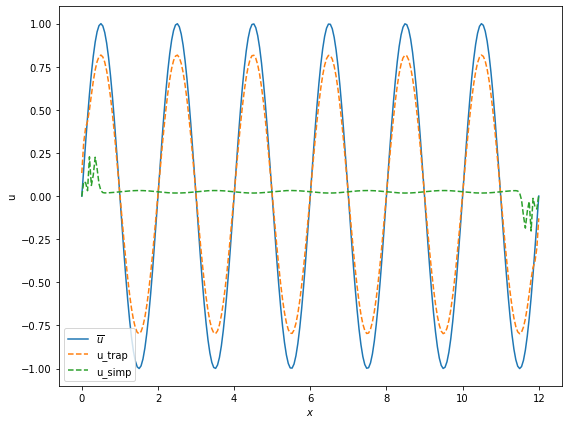

In [55]:
fig = plt.figure(figsize=(8, 6), tight_layout=True)

plt.plot(x_vals, u_exact(x_vals, 10)[0],label = '$\overline{u}$')
plt.plot(x_vals, u[10][:n],'--',label = 'u_trap')
plt.plot(x_vals, usimp[10][:n],'--',label = 'u_simp')



plt.xlabel('$x$')
plt.ylabel('u')
plt.legend()

plt.plot()


err = LA.norm(u[-1][:n]-u_exact(x_vals, T)[0])/LA.norm(u_exact(x_vals, T)[0])

print(err)
print(usimp[-1][:n])

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from numpy import linalg as LA


n = 400

T = 10
a = 0
c = 1
L = 12


dtvect = np.array([1e-2,1e-3,1e-4])

err = np.zeros(len(dtvect))



for j in range(len(dtvect)):
    dt = dtvect[j]

    x_vals = np.linspace(0,L,n)
    u_e = u_exact(x_vals, 0)[0]
    u_0 = np.concatenate((u_e, c*np.ones(n)))
    uk = u_0
    
    u = [u_0]
    t = 0
    times = [t]

    while t + dt < T:
        t += dt
        times.append(t)

        uk1 = IBVP(uk, dt, c, L)
        u.append(uk1)
        uk = uk1

    #error
    err[j] = LA.norm(uk1[:n] - u_exact(x_vals, T)[0])/LA.norm(u_exact(x_vals, T)[0])






KeyboardInterrupt: 

Text(0.5, 1.0, 'Temporal convergence test')

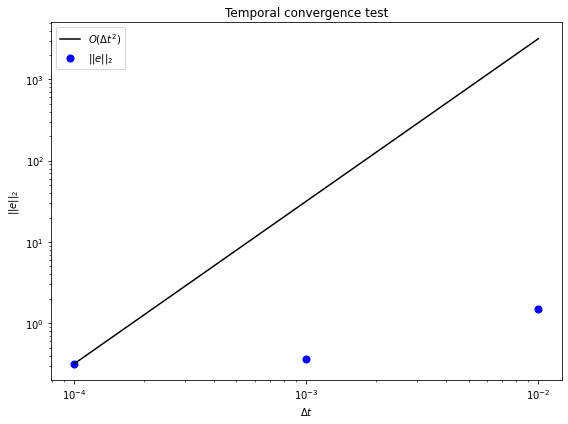

In [ ]:
#error plot
y1 = err[len(dtvect)-1]
y2 = y1*((dtvect[0]/dtvect[len(dtvect)-1])**2)
xtemp = np.array([dtvect[len(dtvect)-1], dtvect[0]])
slope = np.array([y1, y2])

fig = plt.figure(figsize=(8, 6), tight_layout=True)
ax = fig.add_subplot(111)

ax.plot(xtemp, slope,'k-', label='$O(\Delta t^2)$')
ax.set_yscale('log')
ax.set_xscale('log')
ax.scatter(dtvect, err, s=50, color='b', label ='$||e||_2$')


ax.legend()
ax.set_xlabel('$\Delta t$')
ax.set_ylabel('$||e||_2$')

ax.set_title('Temporal convergence test')


In [ ]:
dt = 1e-3
T = 10
a = 0
c = 1
L = 12


nvect = np.array([20, 40, 80, 120, 240])
dxvect = (L)/nvect




err = np.zeros(len(dxvect))


for j in range(len(nvect)):
    n = nvect[j]


    x_vals = np.linspace(0,L,n)
    u_e = u_exact(x_vals, 0)[0]
    u_0 = np.concatenate((u_e, 343*np.ones(n)))
    uk = u_0
    
    u = [u_0]
    t = 0
    times = [t]

    while t + dt < T:
        t += dt
        times.append(t)

        uk1 = IBVP(uk, dt, c, L)
        u.append(uk1)
        uk = uk1



    #error
    print(j)
    err[j] = LA.norm(uk1[:n] - u_exact(x_vals, T)[0])/LA.norm(u_exact(x_vals, T)[0])










0
1
2
3
4


Text(0.5, 1.0, 'Spatial Convergence test')

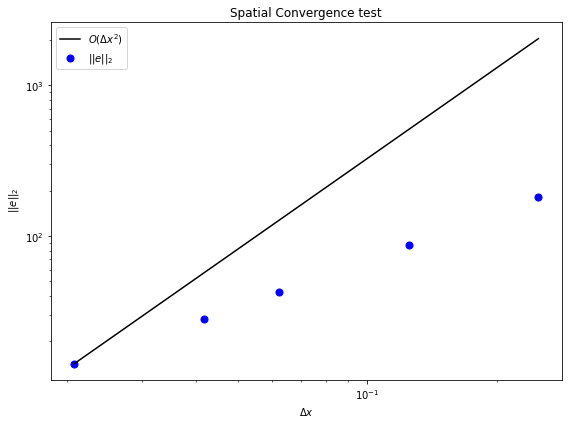

In [ ]:

y1 = err[len(nvect)-1]
y2 = y1*((dxvect[0]/dxvect[len(nvect)-1])**2)
xtemp = np.array([dxvect[len(nvect)-1], dxvect[0]])
slope = np.array([y1, y2])

fig = plt.figure(figsize=(8, 6), tight_layout=True)
ax = fig.add_subplot(111)
ax.plot(xtemp, slope,'k-', label='$O(\Delta x^2)$')
ax.scatter(dxvect, err, s=50, color='b',label ='$||e||_2$')

ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('$\Delta x$')
ax.set_ylabel(' $||e||_2$')
ax.set_title('Spatial Convergence test')


200.0
200.0
200.0


Text(0.5, 0, 'Distance')

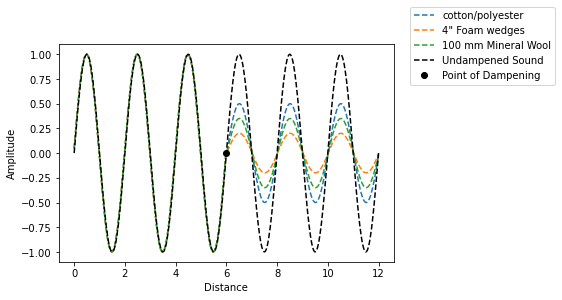

In [32]:
absorptionl = [1-.5,1-.8,1-.65] #1-minus alpha(absroption coefficient) to find how much sound passes through
matlist = ['cotton/polyester','4" Foam wedges','100 mm Mineral Wool']
idx=0
for coeff in absorptionl:

    u2 = []
    for i in u[1][:n]:
        
        u2.append(i*coeff)
        
    u3 = u[0][:n]
    print(n/2)
    u4 = u3[0:200]*coeff
    u5 = u3[200:400]

    u6 = np.concatenate((u5,u4))

    plt.plot(x_vals,u6,'--',label=matlist[idx])
    idx+=1


plt.plot(x_vals,u3,'k--',label="Undampened Sound")
plt.plot(6,0,'ko',label='Point of Dampening')
# plt.title("Sound Dampening")
plt.legend(loc=(1.05,0.815))
plt.ylabel("Amplitude")
plt.xlabel('Distance')

240